In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
nikolskoye ru
taolanaro mg
thompson ca
bredasdorp za
avarua ck
barentsburg sj
tuktoyaktuk ca
punta arenas cl
airai pw
kaitangata nz
taolanaro mg
albany au
kobojango bw
kyabe td
nizhniy kuranakh ru
butaritari ki
aksarka ru
saint-philippe re
rikitea pf
hilo us
aklavik ca
kyra ru
port elizabeth za
faya td
atuona pf
riobamba ec
tomari ru
hilo us
dikson ru
vila franca do campo pt
kenai us
albany au
puerto ayora ec
nguru ng
khatanga ru
busselton au
kurchum kz
kodiak us
mataura pf
changping cn
atuona pf
salisbury us
port alfred za
porto novo cv
hithadhoo mv
cuicatlan mx
rikitea pf
amderma ru
narsaq gl
cochrane ca
comodoro rivadavia ar
buraydah sa
vilyuysk ru
petropavlovsk-kamchatskiy ru
ushuaia ar
upernavik gl
kudahuvadhoo mv
hobart au
rikitea pf
chuy uy
kapaa us
anloga gh
nenjiang cn
yellowknife ca
honningsvag no
araouane ml
ancud cl
nanpiao cn
puerto ayora ec
hervey bay au
punta arenas cl
barrow us
khatanga ru
tarudant ma
bredasdorp za
cape town za
mar del plata ar
puerto 

vagur fo
hobart au
rikitea pf
yulara au
jamestown sh
ruatoria nz
bredasdorp za
hilo us
safakulevo ru
ushuaia ar
mataura pf
atuona pf
hilo us
khatanga ru
illoqqortoormiut gl
chimoio mz
haimen cn
port alfred za
kapaa us
lebu cl
barrow us
san patricio mx
sentyabrskiy ru
dikson ru
punta arenas cl
ialibu pg
xai-xai mz
portland au
warqla dz
new norfolk au
juifang tw
chokurdakh ru
iralaya hn
taolanaro mg
kodiak us
hilo us
viking ca
maniitsoq gl
hilo us
fort nelson ca
taolanaro mg
bhawanipatna in
codrington ag
attawapiskat ca
beringovskiy ru
bambous virieux mu
norman wells ca
cabo san lucas mx
kodiak us
punta arenas cl
sassandra ci
dikson ru
chuy uy
khonsa in
saint-philippe re
busselton au
high prairie ca
bethel us
grong no
port alfred za
tanshui tw
tagusao ph
acari pe
altay cn
port elizabeth za
sungairaya id
hilo us
saskylakh ru
kapaa us
rikitea pf
luchegorsk ru
wenling cn
hilo us
shaoxing cn
vila vu
escada br
mataura pf
puerto ayora ec
rikitea pf
hilo us
sainte-marie mq
manakara mg
pangoa pe

taolanaro mg
pevek ru
lavrentiya ru
kuva uz
jawhar so
port alfred za
cheney us
sumbe ao
ushuaia ar
hofn is
bengkulu id
arraial do cabo br
grand river south east mu
ushuaia ar
nouadhibou mr
harper lr
new norfolk au
bubaque gw
mataura pf
baykit ru
inderborskiy kz
victoria sc
kruisfontein za
shingu jp
punta arenas cl
unguia co
barrow us
mangaratiba br
chokurdakh ru
noumea nc
tiksi ru
barrhead ca
tiksi ru
alice springs au
yuzhno-kurilsk ru
mahebourg mu
butaritari ki
tianpeng cn
hermanus za
damghan ir
puerto ayora ec
inderborskiy kz
komsomolskiy ru
mataura pf
pevek ru
taksimo ru
kulhudhuffushi mv
panama city us
kunya ru
belushya guba ru
busselton au
isparta tr
hobart au
monroe us
san policarpo ph
portland au


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [8]:
import requests
requests.__version__

'2.24.0'

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kobojango
City not found. Skipping...
Processing Record 14 of Set 1 | kyabe
Processing Record 15 of Set 1 | nizhniy kuranakh
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | aksarka
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hilo
Processing Record 21 

Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | praya
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | addi ugri
City not found. Skipping...
Processing Record 43 of Set 4 | soe
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | broome
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 48 of Set 4 | nueva italia
Processing Record 49 of Set 4 | half moon bay
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | shenjiamen
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | victor harbor
Processing Record 4 of Set 5 | hunza
City not found. Skipping...
Processing Record 5 of Set 5 | mrirt
City not found. Skipping...
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | lima
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 5 | mayskiy
Pro

Processing Record 26 of Set 8 | tigil
Processing Record 27 of Set 8 | murray bridge
Processing Record 28 of Set 8 | shache
Processing Record 29 of Set 8 | vagur
Processing Record 30 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 8 | safakulevo
Processing Record 32 of Set 8 | chimoio
Processing Record 33 of Set 8 | haimen
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | ialibu
Processing Record 36 of Set 8 | xai-xai
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | warqla
City not found. Skipping...
Processing Record 39 of Set 8 | juifang
City not found. Skipping...
Processing Record 40 of Set 8 | iralaya
Processing Record 41 of Set 8 | viking
Processing Record 42 of Set 8 | maniitsoq
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | bhawanipatna
Processing Record 45 of Set 8 | norman wells
Processing Record 46 of Set 8 | khonsa
Processing Record 47 of Se

Processing Record 12 of Set 12 | huarmey
Processing Record 13 of Set 12 | coquimbo
Processing Record 14 of Set 12 | miranda
Processing Record 15 of Set 12 | anastacio
Processing Record 16 of Set 12 | ajuchitlan
Processing Record 17 of Set 12 | gillette
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | sao geraldo do araguaia
Processing Record 20 of Set 12 | lagoa
Processing Record 21 of Set 12 | karpathos
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | ramnagar
Processing Record 24 of Set 12 | presidencia roque saenz pena
Processing Record 25 of Set 12 | viedma
Processing Record 26 of Set 12 | yakeshi
Processing Record 27 of Set 12 | bela
Processing Record 28 of Set 12 | soyo
Processing Record 29 of Set 12 | tonota
Processing Record 30 of Set 12 | sabang
Processing Record 31 of Set 12 | jalu
Processing Record 32 of Set 12 | kavaratti
Processing Record 33 of Set 12 | sakakah
Processing Record 34 of Set 12 | kindu
Processing Record 35 of

In [12]:
len(city_data)

593

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,87.80,22,20,14.97,MX,2021-02-03 20:47:29
1,Nikolskoye,59.7035,30.7861,21.99,93,75,13.42,RU,2021-02-03 20:49:55
2,Thompson,55.7435,-97.8558,3.20,78,90,13.80,CA,2021-02-03 20:45:04
3,Bredasdorp,-34.5322,20.0403,60.80,77,0,2.82,ZA,2021-02-03 20:49:55
4,Avarua,-21.2078,-159.7750,84.20,74,40,9.22,CK,2021-02-03 20:49:55
5,Tuktoyaktuk,69.4541,-133.0374,-40.00,67,75,4.61,CA,2021-02-03 20:49:55
6,Punta Arenas,-53.1500,-70.9167,64.40,59,75,14.97,CL,2021-02-03 20:49:56
7,Airai,-8.9266,125.4092,61.61,100,99,5.10,TL,2021-02-03 20:46:14
8,Kaitangata,-46.2817,169.8464,55.00,61,61,11.01,NZ,2021-02-03 20:46:22
9,Albany,42.6001,-73.9662,30.99,67,100,11.99,US,2021-02-03 20:46:08


In [14]:
new_column_order = ["City", "Country", "Date", "Lat" , "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2021-02-03 20:47:29,22.8909,-109.9124,87.80,22,20,14.97
1,Nikolskoye,RU,2021-02-03 20:49:55,59.7035,30.7861,21.99,93,75,13.42
2,Thompson,CA,2021-02-03 20:45:04,55.7435,-97.8558,3.20,78,90,13.80
3,Bredasdorp,ZA,2021-02-03 20:49:55,-34.5322,20.0403,60.80,77,0,2.82
4,Avarua,CK,2021-02-03 20:49:55,-21.2078,-159.7750,84.20,74,40,9.22
5,Tuktoyaktuk,CA,2021-02-03 20:49:55,69.4541,-133.0374,-40.00,67,75,4.61
6,Punta Arenas,CL,2021-02-03 20:49:56,-53.1500,-70.9167,64.40,59,75,14.97
7,Airai,TL,2021-02-03 20:46:14,-8.9266,125.4092,61.61,100,99,5.10
8,Kaitangata,NZ,2021-02-03 20:46:22,-46.2817,169.8464,55.00,61,61,11.01
9,Albany,US,2021-02-03 20:46:08,42.6001,-73.9662,30.99,67,100,11.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/03/21'

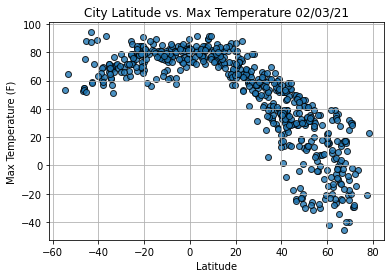

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

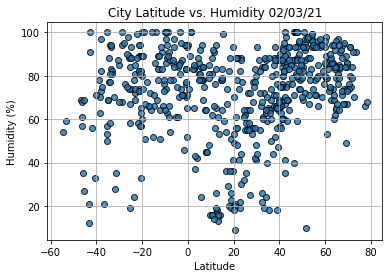

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

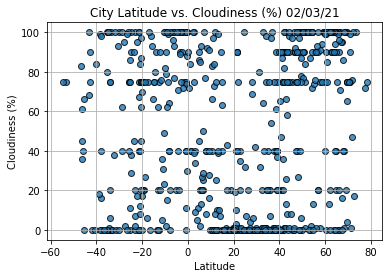

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

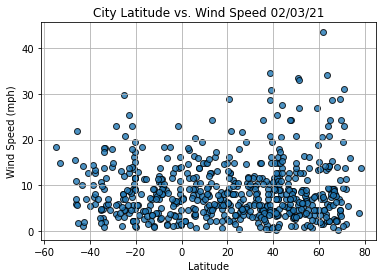

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()